# Deep Learning in Medicine
## BMSC-GA 4493, BMIN-GA 3007
## Homework 3: RNNs

Note 1: If you don't know how to run jupyter on the Prince cluster, here is another step-by-step guide here: 
<a href='https://docs.google.com/document/d/1HIdtzqJ6-RpsV0z2Gf5iXphNBTRca1kHZPlyqFxKpWs/edit?usp=sharing'> **Running Jupyter on the Cluster **</a>

Note 2: If you need to write mathematical terms, you can type your answeres in a Markdown Cell via LaTex
See: <a href="https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook">here</a> if you have issues. To see basic LaTex notation see: <a href="https://en.wikibooks.org/wiki/LaTeX/Mathematics">here</a>.


Submission instruction: Upload and Submit your final jupyter notebook file in newclasses.nyu.edu

**Submission deadline: Thursday April 16th 2020 5pm.**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Question 1: Literature Review: DeepMod (Total points 20 + 10 bonus points)

Read this paper:

#### Qian Liu, Li Fang, Guoliang Yu, Depeng Wang, Chuan-Le Xiao & Kai Wang, _"Detection of DNA base modifications by deep recurrent neural network on Oxford Nanopore sequencing data"_ ,  Nature Communications, 2019 https://www.nature.com/articles/s41467-019-10168-2

We are interested in understanding the task, the methods that is proposed in this publication, technical aspects of the implementation, and possible future work.

**1.1) (5 points)** After you read the full article, go back to section **Methods**. Briefly describe the primary Deep Learning architecture used in DeepMod. Write the number of layers used, number of features input to the network?


<font color=red>It is a bidirectional RNN of LSTM units. It has 3 hidden layers and 7 input features. </font>

**1.2) (5 points)** Describe the optional second deep neural network architecuture, including the number of layers and number of input features, number of nodes in hidden layers. 

<font color=red> It has 2 hidden layers and 14 input features. The first hidden layer has 100 hidden nodes and second hidden layer has 20 hidden nodes </font>

**1.3) (5 points)** What is the loss function used to train the primary network? 

What are the evaluation criteria used by the authors for all the tasks? (**Hint:** Look at Performance measurements)

<font color=red> The loss function for primary network is cross entropy. The evaluation criteria are accuracy, precision, recall, AP and AUC </font>

**1.4) (5 points)** Are there some data augmentation/regularization that authors have used? What are some techniques that could have been used and wasn't?

<font color=red>Authors have used dropout. Potential data augmentation methods including noise injection, window cropping, slicing. Other regulerization techniques like early stopping, l1,l2 regulrization could be used.</font>

**1.5) (Bonus maximum 10 points)**. What other architectures would you try? For each family of models, please do a literature search and see if a paper on that architecture for the task of DNA base modification has been used.

# Question 2: Literature Review: Self Attention (20 points + 10 bonus points)

Read this paper: 


#### Xianlong Zeng, Yunyi Feng, Soheil Moosavinasab, Deborah Lin, Simon Lin, Chang Liu _"Multilevel Self-Attention Model and its Use on Medical Risk Prediction"_ https://psb.stanford.edu/psb-online/proceedings/psb20/Zeng.pdf

After you read the paper, go back to Section 3.2 and 3.3. 

**2.1) (10 points)** Describe the architecture used in the paper to generate patient embedding. Please mention the architecture of self-attention units including any formula given in paper. Also include the input to the architecture.  


<font color =red>The overall architecture consist of two level of self-attention encoders. Each encoder is a self-attention layer stacked with fully connected layers.<br>
    
First medical codes are fed into the first self-attention layer to generate Visit Embeddings. Next Time Embedding is added to Visited Embedding and the result is fed to second self-attention layer. Second self-attention layer aggregates all visit embedding and produces intermediate patient representation u. Finally u is conncatentated with demographic embedding d, and the result is fed through a stack of three fully connected neural net to generate patient embedding p.</font>

self attention unit includes a self-attention layer:
$$\alpha_{c_{k}c_{1}},\alpha_{c_{k}c_{2}}...\alpha_{c_{k}c_{|v|}}= 
softmax(\frac{Q_{c_{1}}K_{c_{1}}}{\sqrt{m}}, \frac{Q_{c_{1}}K_{c_{2}}}{\sqrt{m}},... \frac{Q_{c_{k}}K_{c_{k}}}{\sqrt{m}}) $$

where Q_{c_{k}} and K_{c_{k}} are query and key
$$Q_{c_{k}} = W_{q}c_{k} $$

$$K_{c_{k}} = W_{k}c_{k} $$
The attention layer output goes through a feed-forward structure
$$ S_{c}(c_{k}|c_{1},c_{2},...,c_{j}) = \sigma(f(c_{k}+\sum_{l=1}^{|v|}\alpha_{c_{k}c_{1}}c_{k}))$$
where $\sigma$ denotes residual connection and layer normalization. $f$ denotes feed-forward structure

**2.2) (5 points)** What are the different tasks that the architecture is used to solve? What are the Loss functions used for different tasks? What are the evaluation criteria for the different tasks?

<font color=red> One task is disease classificatin and one task is medical cost prediction. For classification task, negative log likelihood is loss function and recall at K is evaluation criteria. For prediction task, mean squared error is loss function and mean absolute error is evaluation criteria. </font>

**2.3) (5 points)** In Section 5.2 What is the best model according to the evaluation criteria? How is it different from the second best model?

<font color=red>The best model is MSAM with auxiliary task(disease prediction). Compared to the second best model, the best one jointly trains disease prediction as auxiliary task. So it has a loss function as a combination of negative log likelihood and mean squared error.</font>

**2.4) (Bonus maximum 10 points)** What are some alternative architectures/Loss functions/Pretraining methods that you would recommend as followup work? Name 2 potential architectures, and in a few sentences explain why the proposed changes might work better.


# Question 3 - Programming: Build Classifiers on Medical Transcriptions - Recurrent Neural Networks and Self Attention(60 points + 10 bonus points)

Let's build some models now. In this homework, we will focus on a dataset which has around 5000 medical transcriptions and the corresponding medical specialty. The data is available <a href="https://www.kaggle.com/tboyle10/medicaltranscriptions">here</a>.

Here, we will focus on predicting top few classes of medical specialty, from the transcription text. <a href="https://github.com/nyumc-dl/BMSC-GA-4493-Spring2020/tree/master/lab5">Lab 5</a> will be very useful here.

**3.1) (5 points)** Read the csv using Pandas. Select the top 5 classes ('medical_specialty') from the data. Only keep the rows that belong to one of these classes in your data. Which classes are there, and how many rows do you have after this filteration?

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/data/mtsamples.csv')
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [ ]:
df['transcription'].isnull().values.any()

True

In [ ]:
df = df.dropna()

In [ ]:
df.groupby('medical_specialty').count().nlargest(5,'sample_name')

,Unnamed: 0,description,sample_name,transcription,keywords
medical_specialty,,,,,
Surgery,1021,1021,1021,1021,1021
Orthopedic,303,303,303,303,303
Cardiovascular / Pulmonary,280,280,280,280,280
Radiology,251,251,251,251,251
Consult - History and Phy.,234,234,234,234,234


In [ ]:
index = df.groupby('medical_specialty').count().nlargest(5,'sample_name').index.values

In [ ]:
index

array([' Surgery', ' Orthopedic', ' Cardiovascular / Pulmonary',
       ' Radiology', ' Consult - History and Phy.'], dtype=object)

In [ ]:
# The top classes are 'Sugery','Consult - History and Phy.','Cardiovascular / Pulmonary','Orthopedic','Radiology'
topclasses = index
df2 = df[df.medical_specialty.isin(topclasses)][['transcription','medical_specialty']]

In [ ]:
# I have 2089 rows left after filtering out the top five classes and dropna
df2.shape

(2089, 2)

**3.2) (5 points)** Now convert your data into train, test and validation set. Shuffle the rows, and split them with ratios of (train:60%, valid:20%, test:20%). Set the random seed to 2020. Please follow the steps from https://pytorch.org/docs/stable/notes/randomness.html to set all the seeds to make the results reproducible.

In [ ]:
import torch
import numpy as np
from torch.nn.utils.rnn import pack_padded_sequence
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import roc_auc_score
import torch.optim as optim
import time
#device = torch.device("cpu")
device = torch.device("cuda")

torch.manual_seed(2020)
np.random.seed(2020)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
from sklearn.model_selection import train_test_split


# encoding label
classtolabel = {' Surgery':0,' Consult - History and Phy.':1,' Cardiovascular / Pulmonary':2,
                ' Orthopedic':3, ' Radiology':4
               }
df2['medical_specialty'] = df2['medical_specialty'].map(classtolabel)
#

train_all,test_data = train_test_split(df2,test_size = 0.20,random_state=2020)
train_data,validation_data = train_test_split(train_all,test_size = 0.25, random_state=2020)
train_data.index = np.arange(len(train_data))
validation_data.index = np.arange(len(validation_data))
test_data.index = np.arange(len(test_data))


In [ ]:
train_data.head()

,transcription,medical_specialty
0,"PREOPERATIVE DIAGNOSES:,1. Right carpal tunne...",3
1,"INDICATIONS FOR PROCEDURE:, Persistent cough ...",0
2,"PREOPERATIVE DIAGNOSIS:, 12 week incomplete m...",0
3,"REASON FOR CONSULTATION: , Loculated left effu...",1
4,"REASON FOR EXAMINATION:, Abnormal EKG.,FINDIN...",2


**3.3) (5 points)** Create a function to create vocabulary from the training data. Only use the transcription column for this. Use the tokenization scheme of your choice and create a vocabulary.

In [ ]:
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from collections import Counter

UNK = "<UNK>"
PAD = "<PAD>"

def build_vocab(sentences, min_count=3, max_vocab=None):
    """
    Build vocabulary from sentences (list of strings)
    """
    # keep track of the number of appearance of each word
    word_count = Counter()
    
    for sentence in sentences:
        sentence = str(sentence)
        sentence = re.sub('[\\(\[#.!?,\'\/\])0-9]', ' ', sentence)
        word_count.update(word_tokenize(sentence.lower()))
    
    vocabulary = list([w for w in word_count if word_count[w] > min_count]) + [UNK, PAD]
    indices = dict(zip(vocabulary, range(len(vocabulary))))

    return vocabulary, indices

vocabulary, vocab_indices = build_vocab(train_data['transcription'])
print(len(vocabulary))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
7179


In [ ]:
type(vocabulary[0])

str

In [ ]:
vocabulary[:5]

['preoperative', 'diagnoses', ':', 'right', 'carpal']

In [ ]:
list(vocab_indices.items())[:5]

[('preoperative', 0), ('diagnoses', 1), (':', 2), ('right', 3), ('carpal', 4)]

**3.4) (10 points)** Write a dataloader and collate function so that we can begin to train our networks! You can choose to use either the complete transcription text or fix a maximum length of transcription text as input for your model.

In [ ]:
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence
class TranscriptDataset(Dataset):
    def __init__(self, vocab_index, df, label='medical_specialty'):
        self.vocab_index = vocab_index
        self.df = df
        self.label = label
    
    def __len__(self):
        return len(self.df.index)
    
    def __getitem__(self, key):
        sentence = self.df.loc[key,'transcription']
        sentence = str(sentence)
        sentence = re.sub('[\\(\[#.!?,\'\/\])0-9]',' ', sentence)
        token_indices = np.array([self.vocab_index[word] if word in self.vocab_index else self.vocab_index['<UNK>']
                                 for word in word_tokenize(sentence.lower())])
        return (torch.tensor(token_indices), self.df.loc[key, self.label])

def pad_collate(batch):
    (xx, yy) = zip(*batch)
    
    x_lens = [len(x) for x in xx]
        
    xx_pad = pad_sequence(xx, batch_first=True, padding_value=len(vocabulary)-1)
    
    return torch.as_tensor(xx_pad), torch.as_tensor(x_lens), torch.LongTensor(yy)

BATCH_SIZE = 32
train_loader = DataLoader(TranscriptDataset(vocab_indices, train_data),
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          collate_fn = pad_collate)

validation_loader = DataLoader(TranscriptDataset(vocab_indices, validation_data),
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          collate_fn = pad_collate)

test_loader = DataLoader(TranscriptDataset(vocab_indices, test_data),
                         batch_size=BATCH_SIZE,
                         shuffle=True,
                         collate_fn = pad_collate)


In [ ]:
it = iter(train_loader)
sample = next(it)

In [ ]:
sample

(tensor([[   0,    1,    2,  ..., 7178, 7178, 7178],
         [1414,    2, 1044,  ..., 7178, 7178, 7178],
         [ 118,    2,  760,  ..., 7178, 7178, 7178],
         ...,
         [4831,  846, 5222,  ..., 7178, 7178, 7178],
         [5149,  496, 1123,  ..., 7178, 7178, 7178],
         [ 846,    2,  570,  ..., 7178, 7178, 7178]]),
 tensor([ 298,   22,  710,  347,  360,  280,  555,  210,  318,  494,  181,  380,
          337,  562,  326,  314,  222,  635,  591, 1601,  301,  753,  321,  235,
          400,  773,  663,  240,  617,  335,  437,  347]),
 tensor([0, 0, 4, 3, 1, 1, 2, 2, 4, 0, 4, 0, 0, 0, 3, 1, 0, 0, 1, 3, 3, 3, 0, 4,
         3, 0, 0, 3, 0, 1, 4, 4]))

In [ ]:
print(sample[0].size())
print(type(sample[1]))
print(sample[2].size())


torch.Size([32, 1601])
<class 'torch.Tensor'>
torch.Size([32])


**3.5) (10 points)** Now you are ready to build your sequence classification model!

First, Build a simple GRU model that takes as input the text indices from the vocabulary, and ends with a softmax over total number of classes. Use the embedding and hidden dimension of your choice. 

**Please train your model to reach at the least 55% accuracy on the test set.**

At each epoch, compute and print **Average Cross Entropy loss** and **Accuracy** on both **train and validation set** 

Plot your validation and train loss over different epochs. 

Plot your validation and train accuracies over different epochs. 

Finally print accuracy on the test set.

In [ ]:

class GRU(nn.Module):
    def __init__(self, hidden_dim, output_dim, 
                 vocab_size, embedding_dim, rnn='GRU'):
        super(GRU, self).__init__()
                                  
        self.emb = nn.Embedding(vocab_size, embedding_dim, padding_idx=vocab_size-1)
        self.hidden_dim = hidden_dim
        self.rnn_fn = rnn
        assert self.rnn_fn in ['LSTM','GRU']
        self.rnn = getattr(nn, rnn)(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x, x_len):
        x = self.emb(x)
        
        _, last_hidden = self.rnn(pack_padded_sequence(x, x_len, batch_first=True, enforce_sorted=False))
        if self.rnn_fn == 'LSTM':
          last_hidden = last_hidden[0]
        out = self.fc(last_hidden.view(-1, self.hidden_dim))
        return out

In [ ]:


def train(model, scheduler, optimizer, train_loader, test_loader, 
          num_epoch=10,  print_every=100):
    # Training steps
    start_time = time.time()
    loss_fn = nn.CrossEntropyLoss()
    loss_record = {'train':[],'validate':[]}
    acc_record = {'train':[],'validate':[]}
    best_acc = 0 
    for epoch in range(num_epoch):
        model.train()
        running_correct = 0
        running_loss = 0 
        running_total = 0 
        for data, data_len, labels in train_loader:
            data, data_len, labels = data.to(device), data_len.to(device), labels.to(device)
            outputs = model(data, data_len)
            model.zero_grad()
            
            loss = loss_fn(outputs.squeeze(), labels)
            _, preds = torch.max(outputs, dim=1)
            running_correct += torch.sum(preds == labels).item()
            batch_size = data.size()[0]
            running_loss += loss.item()*batch_size
            running_total += batch_size
            loss.backward()
            optimizer.step()

        

        epoch_acc = float(100*running_correct/running_total)
        epoch_loss = float(running_loss/running_total)
       
        loss_record['train'].append(epoch_loss)
        acc_record['train'].append(epoch_acc)
        print('Train set epoch:{} |  epoch Loss:{:6.4f}| epoch accuracy:{:6.4f}'.format(
               epoch, epoch_loss, epoch_acc))     
    
    # Evaluate after every epochh
        running_correct = 0
        running_loss = 0 
        running_total = 0
        model.eval()

        predictions = []
        truths = []

        with torch.no_grad():
            for i, (data, data_len, labels) in enumerate(test_loader):
                data, data_len, labels = data.to(device), data_len.to(device), labels.to(device)
                data = data.long()
                outputs = model(data, data_len)
                pred = outputs.data.max(-1)[1]
                loss = loss_fn(outputs.squeeze(), labels)
                predictions += list(pred.cpu().numpy())
                truths += list(labels.cpu().numpy())
                running_total += data.size(0)
                running_correct += (pred == labels).sum()
                running_loss += loss.item()* data.size(0)
                
            val_acc = float(100 * running_correct / running_total)
            val_loss = float(running_loss/running_total)
            if val_acc > best_acc:
              best_acc = val_acc
              best_model_wts = model.state_dict()

            loss_record['validate'].append(val_loss)
            acc_record['validate'].append(val_acc)
            elapse = time.strftime('%H:%M:%S', time.gmtime(int((time.time() - start_time))))
            print('Validation set |Loss:{:6.4f} | Accuracy:{:6.4f}|  time elapse: {:>9}'.format(
                val_loss,val_acc,elapse))
            
        if scheduler:
          scheduler.step()
    model.load_state_dict(best_model_wts)
    return model, loss_record, acc_record

In [ ]:
rnn_model = GRU(128, 5, len(vocabulary), 128, rnn='GRU').to(device)
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=0.01, weight_decay=10**(-2))
lambda_func = lambda epoch: 0.85 ** epoch
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda_func)
bestmodel, loss_record, acc_record = train(rnn_model,scheduler,optimizer,num_epoch = 15)


Train set epoch:0 |  epoch Loss:1.3740| epoch accuracy:45.7302
Validation set |Loss:1.2763 | Accuracy:49.0000|  time elapse:  00:00:06
Train set epoch:1 |  epoch Loss:1.2518| epoch accuracy:50.9178
Validation set |Loss:1.3010 | Accuracy:50.0000|  time elapse:  00:00:13
Train set epoch:2 |  epoch Loss:1.1996| epoch accuracy:54.3496
Validation set |Loss:1.2778 | Accuracy:49.0000|  time elapse:  00:00:19
Train set epoch:3 |  epoch Loss:1.1815| epoch accuracy:54.9082
Validation set |Loss:1.3054 | Accuracy:49.0000|  time elapse:  00:00:26
Train set epoch:4 |  epoch Loss:1.1652| epoch accuracy:56.5044
Validation set |Loss:1.2686 | Accuracy:51.0000|  time elapse:  00:00:33
Train set epoch:5 |  epoch Loss:1.1084| epoch accuracy:58.5794
Validation set |Loss:1.2732 | Accuracy:50.0000|  time elapse:  00:00:39
Train set epoch:6 |  epoch Loss:1.1072| epoch accuracy:59.8563
Validation set |Loss:1.2062 | Accuracy:51.0000|  time elapse:  00:00:46
Train set epoch:7 |  epoch Loss:1.0970| epoch accuracy:

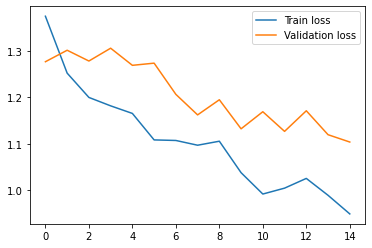

In [ ]:
import matplotlib. pyplot as plt
Epochlength = 15
plt.plot(range(Epochlength),loss_record['train'],label='Train loss')
plt.plot(range(Epochlength),loss_record['validate'],label='Validation loss')
plt.legend()

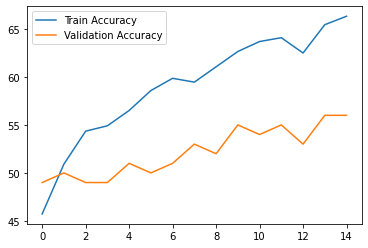

In [ ]:
plt.plot(range(Epochlength),acc_record['train'],label='Train Accuracy')
plt.plot(range(Epochlength),acc_record['validate'],label='Validation Accuracy')
plt.legend()

In [ ]:
def evaluate_model(model,dataloader):
        loss_fn = nn.CrossEntropyLoss()
        running_correct = 0
        running_loss = 0 
        running_total = 0
        model.eval()

        predictions = []
        truths = []

        with torch.no_grad():
            for i, (data, data_len, labels) in enumerate(test_loader):
                data, data_len, labels = data.to(device), data_len.to(device), labels.to(device)
                data = data.long()
                outputs = model(data, data_len)
                pred = outputs.data.max(-1)[1]
                loss = loss_fn(outputs.squeeze(), labels)
                predictions += list(pred.cpu().numpy())
                truths += list(labels.cpu().numpy())
                running_total += labels.size(0)
                running_correct += (pred == labels).sum()
                running_loss = loss.item()* labels.size(0)
                
            val_acc = float(100 * running_correct / running_total)
            val_loss = float(running_loss/running_total)
        return val_acc, val_loss

In [ ]:
test_acc, test_loss = evaluate_model(bestmodel,test_loader)
print('test accuracy is:', test_acc)

test accuracy is: 56.0


**3.6) (25 points)** Now, let's finetune a sequence classification model based on BERT. Please install the Huggingface's Transformers library for this. Use the Pretrained 'bert-base-uncased' model for this problem. Please use the BERT tokenizer from the pretrained built for 'bert-base-uncased' model . Use the AdamW optimizer from the transformers library for optimization. Remember BERT uses Attention masks for input so you need to create a separate dataloader for BERT. Please keep in mind that BERT can handle maximum of 512 tokens.

**Please finetune the model so that it reaches at least 65% accuracy on the test set.**

The rest of your experimental setting should be the same as 3.5:

At each epoch, compute and print **Average Cross Entropy loss** and **Accuracy** on both **train and validation set** 

Plot your validation and train loss over different epochs. 

Plot your validation and train accuracies over different epochs. 

Finally print accuracy on the test set.

In [ ]:
%%bash
pip install transformers

  Created wheel for sacremoses: filename=sacremoses-0.0.41-cp36-none-any.whl size=893334 sha256=cef719763013e30ed0b08649b23b24654dbd40622ca97bbd8cde260f430bf323
  Stored in directory: /root/.cache/pip/wheels/22/5a/d4/b020a81249de7dc63758a34222feaa668dbe8ebfe9170cc9b1
Successfully built sacremoses


<font color=red>Code borrowed from  BERT Fine-Tuning Tutorial with PyTorch
22 Jul 2019
By Chris McCormick and Nick Ryan </font>

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [ ]:
train_all.head()

,transcription,medical_specialty
208,"PROCEDURE:, Upper endoscopy with removal of f...",0
4816,"ENDOVASCULAR BRACHYTHERAPY (EBT),The patient i...",2
877,"PREOPERATIVE DIAGNOSIS: , Blood loss anemia.,P...",0
4136,"REASON FOR CONSULTATION:, Please evaluate stom...",1
718,"PREOPERATIVE DIAGNOSIS: , Endometrial cancer.,...",0


In [ ]:
import gc
gc.collect()


222

In [ ]:
del df
del df2
del train_data
del validation_data
del test_data
del train_all

In [ ]:
sentences=[]
labels=[]

In [ ]:
sentences[:] = train_all.transcription.values
labels[:] = train_all.medical_specialty.values

In [ ]:
import re

# split into 200 word per chunk with 50 words overloap
def sentence_split(text1):
  l_total = []
  l_parcial = []
  if len(text1.split())//150 >0:
    n = len(text1.split())//150
  else: 
    n = 1
  for w in range(n):
    if w == 0:
      l_parcial = text1.split()[:200]
      l_total.append(" ".join(l_parcial))
    else:
      l_parcial = text1.split()[w*150:w*150 + 200]
      l_total.append(" ".join(l_parcial))
  #print(n)
  return l_total

def cleantext(sentences):
    sentence_cleaned[:] = sentences
    for i in range(len(sentence_cleaned)):
        sentence_cleaned[i] = str(sentences[i])
        sentence_cleaned[i] = re.sub('[\\(\[#.!?,\'\/\])0-9]', ' ', sentence_cleaned[i])
        sentence_cleaned[i] = sentence_split(sentence_cleaned[i])
    return sentence_cleaned
        

In [ ]:
sentence_cleaned=[]
sentence_cleaned = cleantext(sentences)

In [ ]:
Flattened_sentence = []
Flattened_label = []
for i in range(len(sentence_cleaned)):
  for j in range(len(sentence_cleaned[i])):
    Flattened_sentence.append(sentence_cleaned[i][j])
    Flattened_label.append(labels[i])

In [ ]:
max_len = 0

# For every sentence...
for sent in Flattened_sentence:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  361


In [ ]:
def Berttokenize(sentences, labels):
  # Tokenize all of the sentences and map the tokens to thier word IDs.
  input_ids = []
  attention_masks = []

  # For every sentence...
  for sent in sentences:
      # `encode_plus` will:
      #   (1) Tokenize the sentence.
      #   (2) Prepend the `[CLS]` token to the start.
      #   (3) Append the `[SEP]` token to the end.
      #   (4) Map tokens to their IDs.
      #   (5) Pad or truncate the sentence to `max_length`
      #   (6) Create attention masks for [PAD] tokens.
      encoded_dict = tokenizer.encode_plus(
                          sent,                      # Sentence to encode.
                          add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                          max_length = 400,           # Pad & truncate all sentences.
                          pad_to_max_length = True,
                          return_attention_mask = True,   # Construct attn. masks.
                          return_tensors = 'pt',     # Return pytorch tensors.
                    )
      
      # Add the encoded sentence to the list.    
      input_ids.append(encoded_dict['input_ids'])
      
      # And its attention mask (simply differentiates padding from non-padding).
      attention_masks.append(encoded_dict['attention_mask'])

  # Convert the lists into tensors.
  input_ids = torch.cat(input_ids, dim=0)
  attention_masks = torch.cat(attention_masks, dim=0)
  labels = torch.tensor(labels)
  return input_ids, attention_masks, labels 



In [ ]:
# Print sentence 0, now as a list of IDs.
input_ids, attention_masks, labels = Berttokenize(Flattened_sentence,Flattened_label)
print('Original: ', Flattened_sentence[0])
print('Token IDs:', input_ids[0])

Original:  PREOPERATIVE DIAGNOSIS: Empyema of the chest left POSTOPERATIVE DIAGNOSIS: Empyema of the chest left PROCEDURE: Left thoracotomy with total pulmonary decortication and parietal pleurectomy PROCEDURE DETAIL: After obtaining the informed consent the patient was brought to the operating room where he underwent a general endotracheal anesthetic using a double-lumen endotracheal tube A time-out process had been followed and preoperative antibiotics were given The patient was positioned with the left side up for a left thoracotomy The patient was prepped and draped in the usual fashion A posterolateral thoracotomy was performed It included the previous incision The chest was entered through the fifth intercostal space Actually there was a very strong and hard parietal pleura which initially did not allow us to obtain a good exposure and actually the layer was so tough that the pin of the chest retractor broke Thanks to Dr X s ingenuity we were able to reuse the chest retractor and

In [ ]:
print(len(input_ids))
print

4158


<function print>

In [ ]:
from torch.utils.data import TensorDataset

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

Bert_train_data,Bert_validation_data = train_test_split(dataset,test_size = 0.25, random_state=2020)


In [ ]:
from torch.utils.data import DataLoader
batch_size = 10

Bert_train_dataloader = DataLoader(
            Bert_train_data,  
            shuffle=True,
            batch_size = batch_size 
        )

Bert_valid_dataloader = DataLoader(
            Bert_validation_data,
            shuffle=True,
            batch_size = batch_size 
        )

In [ ]:
sample = next(iter(Bert_train_dataloader))

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 5,   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)
model.cuda()

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 1e-4, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8, # args.adam_epsilon  - default is 1e-8.,
                  weight_decay = 0
                )
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 2

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(Bert_train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

def Bert_training_loop(model, scheduler, optimizer, train_dataloader, validation_dataloader, epochs=10):

  training_stats = []

  # Measure the total training time for the whole run.
  total_t0 = time.time()

  # For each epoch...
  for epoch_i in range(0, epochs):
      
      #========
      # Training
      # =======
      print("")
      print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
      print('Training...')

      # Measure how long the training epoch takes.
      t0 = time.time()

      # Reset the total loss for this epoch.
      total_train_loss = 0
      total_train_accuracy = 0
      nb_train_steps = 0

      model.train()

      # For each batch of training data...
      for step, batch in enumerate(train_dataloader):

          # Progress update every 40 batches.
          if step % 40 == 0 and not step == 0:
              # Calculate elapsed time in minutes.
              elapsed = format_time(time.time() - t0)
              
              # Report progress.
              print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

          # Unpack this training batch from our dataloader. 
        
          b_input_ids = batch[0].to(device)
          b_input_mask = batch[1].to(device)
          b_labels = batch[2].to(device)

          model.zero_grad()        
          loss, logits = model(b_input_ids, 
                              token_type_ids=None, 
                              attention_mask=b_input_mask, 
                              labels=b_labels)

          total_train_loss += loss.item()
          loss.backward()

          # Clip the norm of the gradients to 1.0.
          # This is to help prevent the "exploding gradients" problem.
          torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

          optimizer.step()
          scheduler.step()
          # Move logits and labels to CPU
          logits = logits.detach().cpu().numpy()
          label_ids = b_labels.to('cpu').numpy()

          total_train_accuracy += flat_accuracy(logits, label_ids)
          

      # Report the final accuracy for this validation run.
      avg_train_accuracy = total_train_accuracy / len(train_dataloader)
      # Calculate the average loss over all of the batches.
      avg_train_loss = total_train_loss / len(train_dataloader)            
      
      # Measure how long this epoch took.
      training_time = format_time(time.time() - t0)

      print("")
      print("  Accuracy: {0:.2f}".format(avg_train_accuracy))
      print("  Average training loss: {0:.2f}".format(avg_train_loss))
      print("  Training epcoh took: {:}".format(training_time))
     # ============
     # Validation
     # ===========
      print("")
      print("Running Validation...")

      t0 = time.time()

    
      model.eval()

      total_eval_accuracy = 0
      total_eval_loss = 0
      nb_eval_steps = 0

      # Evaluate data for one epoch
      for batch in validation_dataloader:
          
          b_input_ids = batch[0].to(device)
          b_input_mask = batch[1].to(device)
          b_labels = batch[2].to(device)
          
          
          with torch.no_grad():        

              (loss, logits) = model(b_input_ids, 
                                    token_type_ids=None, 
                                    attention_mask=b_input_mask,
                                    labels=b_labels)
              
          # Accumulate the validation loss.
          total_eval_loss += loss.item()

          # Move logits and labels to CPU
          logits = logits.detach().cpu().numpy()
          label_ids = b_labels.to('cpu').numpy()

        
          total_eval_accuracy += flat_accuracy(logits, label_ids)
          

      # Report the final accuracy for this validation run.
      avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
      print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

      # Calculate the average loss over all of the batches.
      avg_val_loss = total_eval_loss / len(validation_dataloader)
      
      # Measure how long the validation run took.
      validation_time = format_time(time.time() - t0)
      
      print("  Validation Loss: {0:.2f}".format(avg_val_loss))
      print("  Validation took: {:}".format(validation_time))

      # Record all statistics from this epoch.
      training_stats.append(
          {
              'epoch': epoch_i + 1,
              'Training Loss': avg_train_loss,
              'Training Accur': avg_train_accuracy,
              'Valid. Loss': avg_val_loss,
              'Valid. Accur.': avg_val_accuracy,
              'Training Time': training_time,
              'Validation Time': validation_time
          }
      )

  print("")
  print("Training complete!")

  print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))
  return model, training_stats

In [ ]:
fintuned_model, record = Bert_training_loop(model,scheduler,optimizer,train_dataloader=Bert_train_dataloader,
                                                         validation_dataloader=Bert_valid_dataloader, epochs = epochs)


======== Epoch 1 / 2 ========
Training...
  Batch    40  of     82.    Elapsed: 0:00:59.
  Batch    80  of     82.    Elapsed: 0:01:58.

  Accuracy: 0.58
  Average training loss: 0.98
  Training epcoh took: 0:02:01

Running Validation...
  Accuracy: 0.71
  Validation Loss: 0.69
  Validation took: 0:00:14

======== Epoch 2 / 2 ========
Training...
  Batch    40  of     82.    Elapsed: 0:00:59.
  Batch    80  of     82.    Elapsed: 0:01:58.

  Accuracy: 0.67
  Average training loss: 0.69
  Training epcoh took: 0:02:00

Running Validation...
  Accuracy: 0.63
  Validation Loss: 0.68
  Validation took: 0:00:14

Training complete!
Total training took 0:04:28 (h:mm:ss)


In [ ]:
record

[{'Training Accur': 0.5786585365853659,
  'Training Loss': 0.9787513268430058,
  'Training Time': '0:02:01',
  'Valid. Accur.': 0.7107142857142857,
  'Valid. Loss': 0.6857812793127128,
  'Validation Time': '0:00:14',
  'epoch': 1},
 {'Training Accur': 0.6719512195121953,
  'Training Loss': 0.692600577706244,
  'Training Time': '0:02:00',
  'Valid. Accur.': 0.6285714285714287,
  'Valid. Loss': 0.6794883672680173,
  'Validation Time': '0:00:14',
  'epoch': 2}]

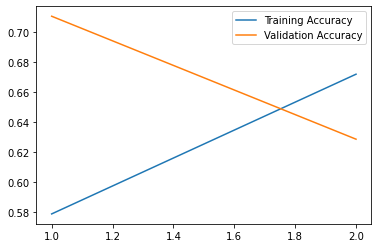

In [ ]:
import matplotlib. pyplot as plt
epoch = [1,2]
plt.plot(epoch,[0.5787,0.6720],label='Training Accuracy')
plt.plot(epoch,[0.7107,0.6286],label ='Validation Accuracy')
plt.legend()

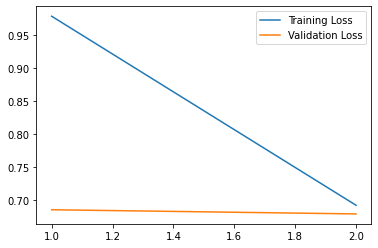

In [ ]:
plt.plot(epoch,[0.9786,0.6926],label='Training Loss')
plt.plot(epoch,[0.6858,0.6795],label ='Validation Loss')
plt.legend()

In [ ]:
a = []
while(1):
    a.append('1')

In [ ]:
# Create Test Dataset and Loader
sentences_t = []
labels_t = []
sentences_t[:] = test_data.transcription.values
labels_t[:] = test_data.medical_specialty.values

sentence_cleaned_t=[]
sentence_cleaned_t = cleantext(sentences)

Flattened_sentence = []
Flattened_label = []
for i in range(len(sentence_cleaned_t)):
  for j in range(len(sentence_cleaned_t[i])):
    Flattened_sentence.append(sentence_cleaned_t[i][j])
    Flattened_label.append(labels_t[i])


input_ids_t, attention_masks_t, labels_t = Berttokenize(Flattened_sentence,Flattened_label)

# Create the DataLoader.
testdata = TensorDataset(input_ids_t, attention_masks_t, labels_t)
test_dataloader = DataLoader(testdata, shuffle=True, batch_size=batch_size)

In [ ]:
def evaluate(model, test_dataloader):

  # Put model in evaluation mode
  model.eval()

  # Tracking variables 
  predictions , true_labels = [], []
  total_test_accuracy = 0
  total_test_loss = 0
  nb_test_steps = 0

  # Predict 
  for batch in test_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    
    # Telling the model not to compute or store gradients, saving memory and 
    # speeding up prediction
    with torch.no_grad():
        # Forward pass, calculate logit predictions
        outputs = model(b_input_ids, token_type_ids=None, 
                        attention_mask=b_input_mask)

    logits = outputs[0]

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    
    # Store predictions and true labels
    predictions.append(logits)
    true_labels.append(label_ids)

    total_test_accuracy += flat_accuracy(logits, label_ids)
          

  # Report the final accuracy for this validation run.
  avg_test_accuracy = total_test_accuracy / len(test_dataloader)
  print("  Accuracy: {0:.2f}".format(avg_test_accuracy))


In [ ]:
evaluate(fintuned_model,test_dataloader)

  Accuracy: 0.67


**3.7) (Bonus maximum 10 points)** List 5 examples on the test set that BERT misclassified. Describe reasons identified for misclassification.